In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/andrewmvd/cyberbullying-classification/cyberbullying_tweets.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/d/andrewmvd/cyberbullying-classification/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.tweet_text[1]

'Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc'

In [4]:
df.cyberbullying_type[1]

'not_cyberbullying'

In [5]:
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "]+", flags=re.UNICODE
)

def is_mostly_english(text):
    english_chars = sum(c.isascii() and c.isalpha() for c in text)
    total_chars = sum(c.isalpha() for c in text)
    return total_chars == 0 or (english_chars / total_chars) > 0.7

def clean_tweet(tweet):
    if not is_mostly_english(tweet):
        return ''
    
    tweet = emoji_pattern.sub('', tweet)
    tweet = re.sub(r'@[\w_]+ ', '', tweet)
    tweet = re.sub(r'#(\w+)', r'\1', tweet)
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    words = tweet.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)

df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
print(df[['tweet_text', 'cleaned_tweet']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                       cleaned_tweet  
0            words katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                   classy whore red velvet cupcakes  
3  meh p thanks heads concerned another angry dud...  
4  isis account pretending kurdish account like i...  


In [6]:
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "]+", flags=re.UNICODE
)

def is_mostly_english(text):
    english_chars = sum(c.isascii() and c.isalpha() for c in text)
    total_chars = sum(c.isalpha() for c in text)
    return total_chars == 0 or (english_chars / total_chars) > 0.7

def clean_tweet(tweet):
    if not is_mostly_english(tweet):
        return ''
    
    tweet = emoji_pattern.sub('', tweet)
    tweet = re.sub(r'@[\w_]+ ', '', tweet)
    tweet = re.sub(r'#(\w+)', r'\1', tweet)
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    words = tweet.split()
    cleaned_words = [
        word.lower() for word in words 
        if word.lower() not in stop_words and word.lower() != 'mkr'
    ]
    return ' '.join(cleaned_words)

df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
print(df[['tweet_text', 'cleaned_tweet']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                       cleaned_tweet  
0                words katandandre food crapilicious  
1  aussietv white theblock imacelebrityau today s...  
2                   classy whore red velvet cupcakes  
3  meh p thanks heads concerned another angry dud...  
4  isis account pretending kurdish account like i...  


In [7]:
df.columns
df = df.dropna()
print(f"Null values after dropping: {df.isnull().sum().sum()}")

Null values after dropping: 0


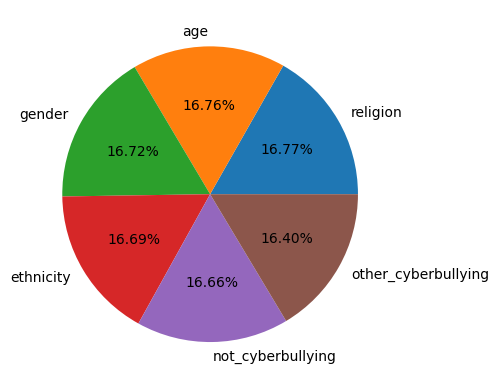

In [8]:
val = df.cyberbullying_type.value_counts()
import matplotlib.pyplot as plt
plt.pie(val,labels = val.index,autopct = "%.2f%%")
df['cyberbullying_type'] = df['cyberbullying_type'].apply(
    lambda x: 'not_cyberbullying' if x == 'not_cyberbullying' else 'cyberbullying'
)

([<matplotlib.patches.Wedge at 0x78105d07d5d0>,
 [Text(-0.9527607384216036, 0.5497699294453279, 'cyberbullying'),
  Text(0.9527607126850149, -0.549769974047276, 'not_cyberbullying')],
 [Text(-0.5196876755026928, 0.2998745069701788, '83.34%'),
  Text(0.5196876614645536, -0.29987453129851416, '16.66%')])

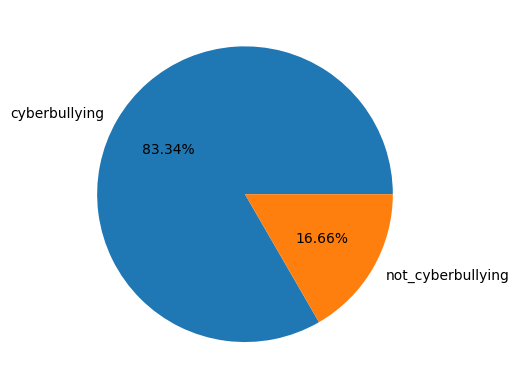

In [9]:
val = df.cyberbullying_type.value_counts()
import matplotlib.pyplot as plt
plt.pie(val,labels = val.index,autopct = "%.2f%%")

In [10]:
df.shape

(47692, 3)

In [11]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 85.9 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [12]:
df_major = df[df['cyberbullying_type'] == 'cyberbullying']
df_minor = df[df['cyberbullying_type'] == 'not_cyberbullying']
df_major_downsampled = df_major.sample(n=len(df_minor), random_state=42)
df_balanced = pd.concat([df_major_downsampled, df_minor]).sample(frac=1, random_state=42).reset_index(drop=True)
df = df_balanced
print(df['cyberbullying_type'].value_counts())

cyberbullying_type
cyberbullying        7945
not_cyberbullying    7945
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x78105dc4b590>,
 [Text(6.735557395310444e-17, 1.1, 'cyberbullying'),
  Text(-2.0206672185931328e-16, -1.1, 'not_cyberbullying')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-1.1021821192326178e-16, -0.6, '50.00%')])

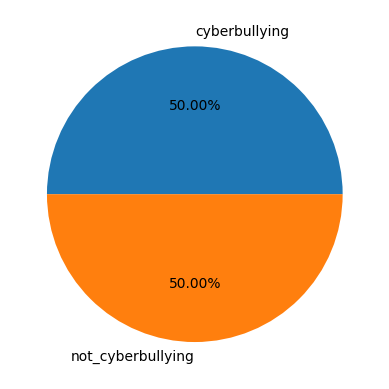

In [13]:
val = df.cyberbullying_type.value_counts()
import matplotlib.pyplot as plt
plt.pie(val,labels = val.index,autopct = "%.2f%%")

In [14]:
df.head()

,tweet_text,cyberbullying_type,cleaned_tweet
0,im so happy the bitch who used to bully me in ...,cyberbullying,im happy bitch used bully middle school fuckin...
1,@eljaverg @RicardoAlemanMx Dude are yuo talkin...,cyberbullying,dude yuo talking abaut familia yuo look idiot ...
2,@Eli_FlockaJames I can't! I'm not a cyber bull...,cyberbullying,cant im cyber bully sad face lol
3,Literally Who? Literally #LawAndOrderSVU.,not_cyberbullying,literally literally lawandordersvu
4,"When I get home, I have 1 million emails to an...",cyberbullying,get home 1 million emails answer httptcodayo0s...


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cyberbullying_type'])

In [41]:
pip install transformers datasets scikit-learn torch seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing

In [18]:
import torch
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from torch.utils.data import Dataset, DataLoader
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification
)
from torch.optim import AdamW
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_tweet'], y, test_size=0.2, random_state=42
)

In [20]:
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self): return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx], padding='max_length', truncation=True,
            max_length=self.max_len, return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }


In [21]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [22]:
train_bert = TweetDataset(X_train.tolist(), y_train.tolist(), bert_tokenizer)
test_bert = TweetDataset(X_test.tolist(), y_test.tolist(), bert_tokenizer)

In [23]:
train_roberta = TweetDataset(X_train.tolist(), y_train.tolist(), roberta_tokenizer)
test_roberta = TweetDataset(X_test.tolist(), y_test.tolist(), roberta_tokenizer)

In [24]:
train_loader_bert = DataLoader(train_bert, batch_size=16, shuffle=True)
test_loader_bert = DataLoader(test_bert, batch_size=16)

In [25]:
train_loader_roberta = DataLoader(train_roberta, batch_size=16, shuffle=True)
test_loader_roberta = DataLoader(test_roberta, batch_size=16)

In [26]:
def train_model(model, train_loader, test_loader, epochs=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5)
    train_accs, test_accs = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            loss.backward()
            optimizer.step()
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        train_accs.append(correct / total)

        # Evaluation
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                preds = torch.argmax(outputs.logits, dim=1)
                all_preds += preds.cpu().tolist()
                all_labels += labels.cpu().tolist()
        test_acc = accuracy_score(all_labels, all_preds)
        test_accs.append(test_acc)
    
    return train_accs, test_accs, all_preds, all_labels

In [27]:
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
acc_bert_train, acc_bert_test, preds_bert, labels_bert = train_model(bert_model, train_loader_bert, test_loader_bert)

In [31]:
bert_acc = accuracy_score(y_test, preds_bert)
print(f"BERT Accuracy: {bert_acc * 100:.2f}%")

BERT Accuracy: 84.17%


In [32]:
acc_roberta_train, acc_roberta_test, preds_roberta, labels_roberta = train_model(roberta_model, train_loader_roberta, test_loader_roberta)

In [33]:
roberta_acc = accuracy_score(y_test, preds_roberta)
print(f"RoBERTa Accuracy: {roberta_acc * 100:.2f}%")

RoBERTa Accuracy: 85.59%


In [39]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def tokenize_and_vectorize(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    sentence_embedding = outputs.last_hidden_state[:, 0, :]
    return sentence_embedding

df['embeddings'] = df['cleaned_tweet'].apply(lambda x: tokenize_and_vectorize(x))

print(f"Sample Embeddings for the first row: {df['embeddings'][0]}")
print(f"Shape of the embeddings for first tweet: {df['embeddings'][0].shape}")
df.head()

Sample Embeddings for the first row: tensor([[-3.4911e-01,  7.0606e-01, -1.3909e-01, -3.0295e-01, -4.4259e-01,
         -5.4273e-02,  6.6251e-01,  4.9071e-01,  3.1705e-02, -1.8855e-01,
          2.6334e-01, -6.5606e-04, -2.4897e-01,  2.2539e-01,  4.5807e-01,
          3.0490e-01,  5.6412e-02,  4.9907e-01,  1.9558e-01,  6.0959e-02,
         -3.1967e-01, -5.9977e-01,  1.9512e-02, -2.6137e-01,  8.9153e-02,
          1.4043e-01,  1.0951e-01, -1.6941e-01,  3.0461e-01, -2.0565e-01,
         -1.0260e-01,  2.2778e-01,  2.2140e-03, -6.2387e-02,  3.6402e-01,
         -1.1077e-01,  2.9365e-01, -6.7249e-02,  1.7571e-01,  3.5816e-01,
         -4.9437e-01, -2.0304e-01, -9.3605e-02, -2.2291e-01,  1.3604e-01,
         -2.4288e-01, -3.2047e+00, -1.5989e-01,  2.4548e-01, -6.4369e-01,
          5.4302e-01, -6.0991e-01, -2.0400e-01,  4.8080e-01, -4.8950e-01,
          4.1612e-01,  9.1257e-02,  1.4829e-01, -1.2851e-02,  4.6658e-01,
          1.2415e-01,  3.1928e-01, -2.0701e-01,  4.5638e-01, -9.9915e-02,
 

,tweet_text,cyberbullying_type,cleaned_tweet,embeddings
0,im so happy the bitch who used to bully me in ...,cyberbullying,im happy bitch used bully middle school fuckin...,"[[tensor(-0.3491), tensor(0.7061), tensor(-0.1..."
1,@eljaverg @RicardoAlemanMx Dude are yuo talkin...,cyberbullying,dude yuo talking abaut familia yuo look idiot ...,"[[tensor(-0.3115), tensor(0.1762), tensor(-0.1..."
2,@Eli_FlockaJames I can't! I'm not a cyber bull...,cyberbullying,cant im cyber bully sad face lol,"[[tensor(-0.4458), tensor(0.2628), tensor(-0.1..."
3,Literally Who? Literally #LawAndOrderSVU.,not_cyberbullying,literally literally lawandordersvu,"[[tensor(-0.0716), tensor(0.1871), tensor(-0.2..."
4,"When I get home, I have 1 million emails to an...",cyberbullying,get home 1 million emails answer httptcodayo0s...,"[[tensor(-0.1475), tensor(0.1208), tensor(0.09..."


In [40]:
import numpy as np
df['embedding_array'] = df['embeddings'].apply(lambda x: x[0].numpy())
X = np.vstack(df['embedding_array'].values)

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cyberbullying_type'])
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (labels): {y.shape}")

Shape of X (features): (15890, 768)
Shape of y (labels): (15890,)


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [45]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [46]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [47]:
class HAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(HAN, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.attn = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence length = 1
        gru_out, _ = self.gru(x)  # shape: (batch_size, seq_len=1, hidden*2)
        attn_weights = torch.softmax(self.attn(gru_out), dim=1)
        attn_applied = torch.sum(attn_weights * gru_out, dim=1)
        output = self.fc(attn_applied)
        return output

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HAN(input_dim=768, hidden_dim=128, num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)

In [61]:
epochs = 5
han_acc_per_epoch = []

for epoch in range(epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Eval
    model.eval()
    all_preds = []
    with torch.no_grad():
        for batch_x, _ in test_loader:
            batch_x = batch_x.to(device)
            outputs = model(batch_x)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)

    acc = accuracy_score(y_test, all_preds)
    han_acc_per_epoch.append(acc)
    print(f"Epoch {epoch+1}: HAN Accuracy = {acc * 100:.2f}%")

Epoch 1: HAN Accuracy = 79.61%
Epoch 2: HAN Accuracy = 80.40%
Epoch 3: HAN Accuracy = 78.10%
Epoch 4: HAN Accuracy = 79.83%
Epoch 5: HAN Accuracy = 80.37%


In [62]:
final_han_acc = han_acc_per_epoch[-1]
print(f"HAN Accuracy: {final_han_acc * 100:.2f}%")

HAN Accuracy: 80.37%


In [68]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
import numpy as np

In [69]:
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        return torch.tensor(self.embeddings[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

In [70]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=256, num_layers=1, num_classes=2, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch_size, seq_len=1, input_dim]
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])  # take output of last time step
        return self.fc(out)

In [71]:
def train_lstm(model, train_loader, test_loader, epochs=5, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    acc_per_epoch = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                all_preds.extend(torch.argmax(preds, axis=1).cpu().numpy())
                all_labels.extend(yb.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        acc_per_epoch.append(acc)
        print(f"Epoch {epoch+1} Test Accuracy: {acc:.4f}")
    
    return acc_per_epoch, all_preds, all_labels

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_dataset = EmbeddingDataset(X_train, y_train)
test_dataset = EmbeddingDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [74]:
lstm_model = LSTMClassifier()
acc_lstm_test, lstm_preds, lstm_labels = train_lstm(lstm_model, train_loader, test_loader, epochs=10)

Epoch 1 Test Accuracy: 0.8059
Epoch 2 Test Accuracy: 0.8090
Epoch 3 Test Accuracy: 0.8166
Epoch 4 Test Accuracy: 0.8181
Epoch 5 Test Accuracy: 0.8175
Epoch 6 Test Accuracy: 0.8216
Epoch 7 Test Accuracy: 0.8210
Epoch 8 Test Accuracy: 0.8027
Epoch 9 Test Accuracy: 0.8027
Epoch 10 Test Accuracy: 0.8027


In [78]:
avg_lstm_acc = sum(acc_lstm_test) / len(acc_lstm_test)
print(f"LSTM Accuracy: {avg_lstm_acc * 100:.2f}%")

LSTM Accuracy: 81.18%


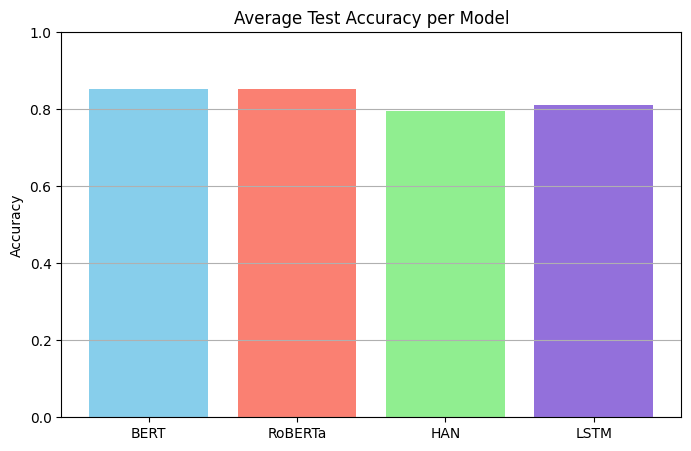

In [77]:
final_bert_acc = sum(acc_bert_test)/len(acc_bert_test)
final_roberta_acc = sum(acc_roberta_test)/len(acc_roberta_test)
final_han_acc=sum(han_acc_per_epoch)/len(han_acc_per_epoch)
avg_lstm_acc = sum(acc_lstm_test) / len(acc_lstm_test)

plt.figure(figsize=(8, 5))
plt.bar(['BERT', 'RoBERTa', 'HAN', 'LSTM'],
        [final_bert_acc, final_roberta_acc, final_han_acc, avg_lstm_acc],
        color=['skyblue', 'salmon', 'lightgreen', 'mediumpurple'])

plt.title('Average Test Accuracy per Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [64]:
def plot_confusion(preds, labels, title):
    cm = confusion_matrix(labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-CB', 'CB'], yticklabels=['Non-CB', 'CB'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

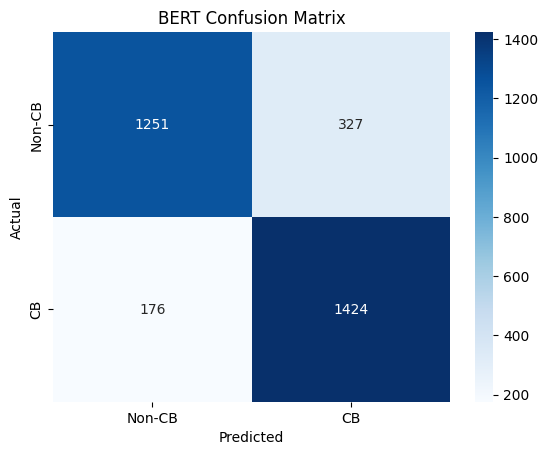

In [65]:
plot_confusion(preds_bert, labels_bert, "BERT Confusion Matrix")

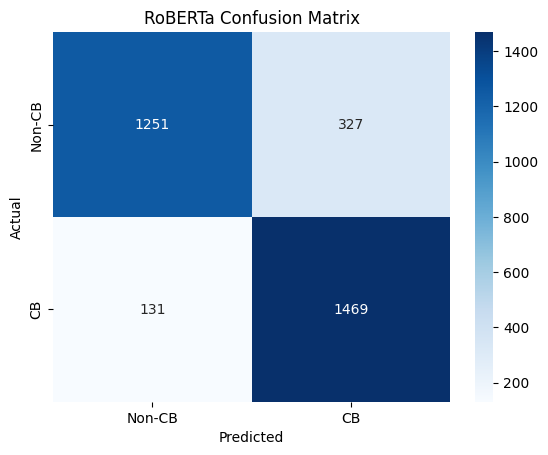

In [66]:
plot_confusion(preds_roberta, labels_roberta, "RoBERTa Confusion Matrix")

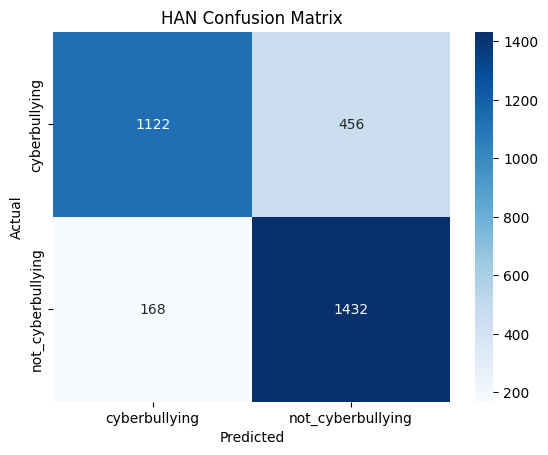

In [67]:
cm = confusion_matrix(y_test, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("HAN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

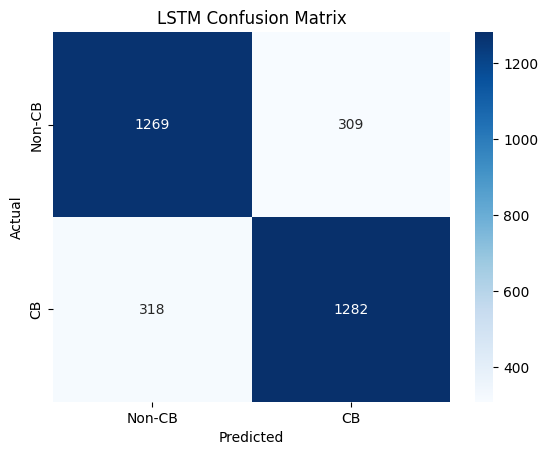

In [79]:
plot_confusion(lstm_preds, lstm_labels, title="LSTM Confusion Matrix")
